The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


In [1]:
#!pip install matplotlib==3.4

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
import os

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [187]:
strategy = tf.distribute.TPUStrategy(resolver) # TPU çekirdeklerinde kapsama işlemlerinde hangi işlemler yapılacak

## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [134]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 50)

In [5]:
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [6]:
df = pd.read_csv("/content/drive/MyDrive/SentimentAnalysis/Womens Clothing E-Commerce Reviews.csv", index_col=0)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [7]:
len(df)

23486

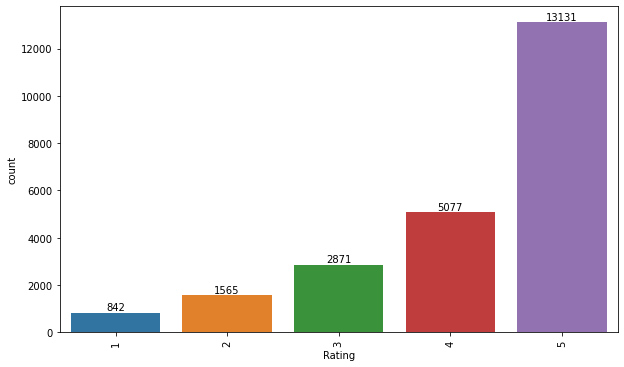

In [8]:
ax = sns.countplot(data =df, x ="Rating")
ax.bar_label(ax.containers[0]) # tek label. for döngüsüne gerek yok
plt.xticks(rotation = 90); 

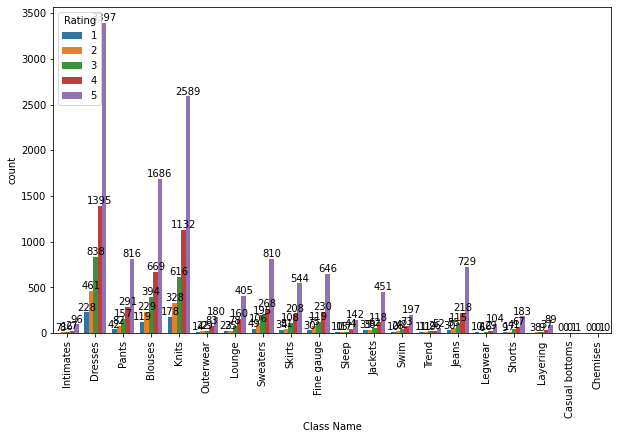

In [9]:
ax = sns.countplot(data = df, x ="Class Name", hue = "Rating")
for p in ax.containers:
    ax.bar_label(p)
    plt.xticks(rotation = 90); 

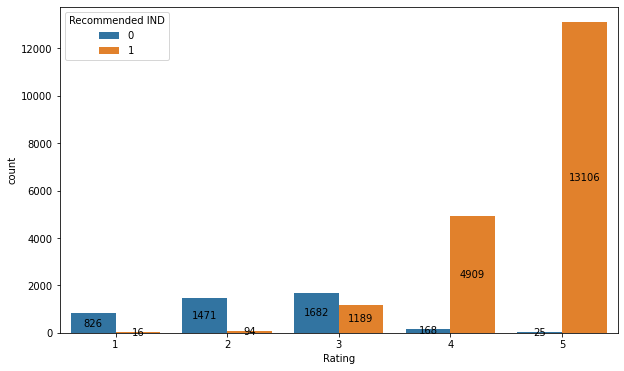

In [10]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x="Rating", data=df, hue = "Recommended IND")
for p in ax.containers:
  ax.bar_label(p, label_type="center")

In [11]:
df = df[~((df["Rating"] == 1) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 2) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 3) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 4) & (df["Recommended IND"] == 0))]
df = df[~((df["Rating"] == 5) & (df["Recommended IND"] == 0))]

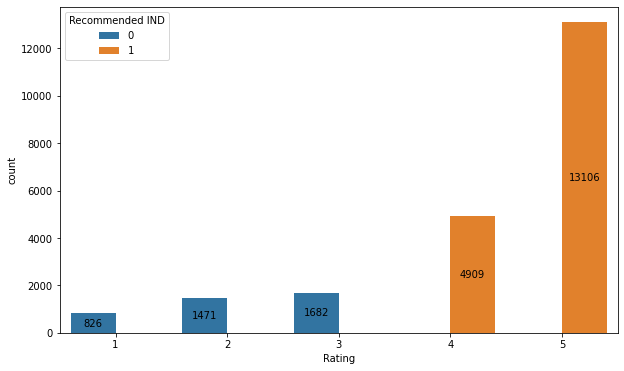

In [12]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x="Rating", data=df, hue = "Recommended IND")
for p in ax.containers:
  ax.bar_label(p, label_type="center")

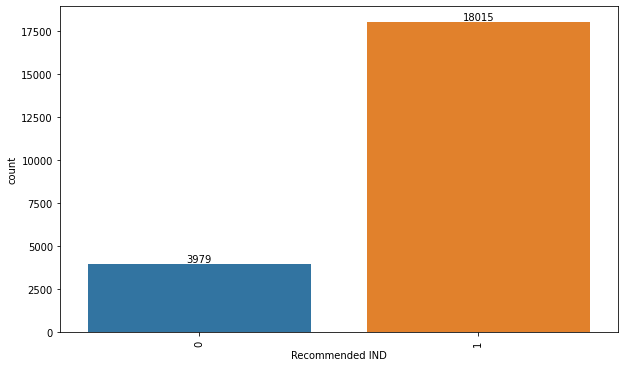

In [32]:
ax = sns.countplot(data =df, x ="Recommended IND")
ax.bar_label(ax.containers[0]) # tek label. for döngüsüne gerek yok
plt.xticks(rotation = 90); 

### Data Wrangling

In [15]:
df2 = df.copy()

In [16]:
df2[["Review Text", "Recommended IND"]].head()

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [17]:
df["Recommended IND"].value_counts()

1    18015
0     3979
Name: Recommended IND, dtype: int64

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [18]:
df2.rename(columns={'Recommended IND': 'Rate',
                   'Review Text': 'Comment'},
          inplace=True, errors='raise')

In [19]:
df2.columns

Index(['Clothing ID', 'Age', 'Title', 'Comment', 'Rating', 'Rate',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name'],
      dtype='object')

---
---


In [20]:
df2.drop(['Clothing ID', 'Age', 'Title', 'Rating', 'Positive Feedback Count', 'Division Name', 'Department Name', 'Class Name'], axis = 1, inplace = True) 

### Missing Value Detection

In [21]:
df2.isnull().sum()

Comment    819
Rate         0
dtype: int64

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21175 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  21175 non-null  object
 1   Rate     21175 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 496.3+ KB


In [22]:
df2.dropna(axis=0, inplace=True)

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21175 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  21175 non-null  object
 1   Rate     21175 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 496.3+ KB


In [25]:
df2.reset_index(drop=True, inplace=True)

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21175 entries, 0 to 21174
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  21175 non-null  object
 1   Rate     21175 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 331.0+ KB


In [27]:
df2

,Comment,Rate
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
21170,I was surprised at the positive reviews for th...,0
21171,So i wasn't sure about ordering this skirt bec...,1
21172,I was very happy to snag this dress at such a ...,1
21173,"This fit well, but the top was very see throug...",0


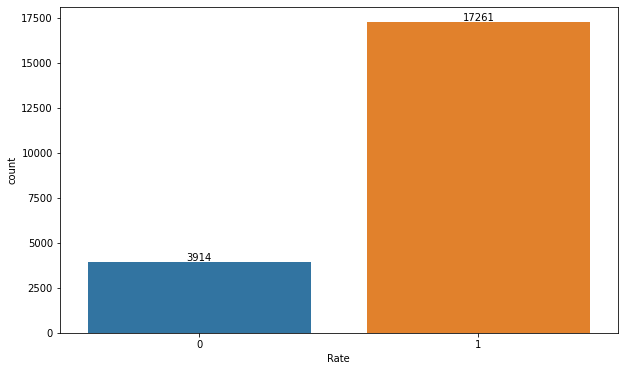

In [29]:
plt.fig = plt.figure(figsize = (10,6))
ax = sns.countplot(x="Rate", data=df2)
ax.bar_label(ax.containers[0]);

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [33]:
stop_words = stopwords.words('english')
for i in ["not", "no"]:
        stop_words.remove(i)

In [34]:
def cleaning(data):
    
    import re
    
    #1. Removing URLS
    data = re.sub('http\S+', '', data).strip()
    data = re.sub('www\S+', '', data).strip()

    #2. Removing Tags
    data = re.sub('#\S+', '', data).strip()

    #3. Removing Mentions
    data = re.sub('@\S+', '', data).strip()
    
    #4. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")
    
    #5. Tokenize
    text_tokens = word_tokenize(data.lower())
    
    #6. Remove Puncs and number
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #7. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #8. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [35]:
df2['Comment'] = df2['Comment'].apply(cleaning)
df2['Comment'].head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: Comment, dtype: object

In [36]:
df2 = df2[["Rate", "Comment"]]
df2.head()

,Rate,Comment
0,1,absolutely wonderful silky sexy comfortable
1,1,love dress sooo pretty happened find store im ...
2,0,high hope dress really wanted work initially o...
3,1,love love love jumpsuit fun flirty fabulous ev...
4,1,shirt flattering due adjustable front tie perf...


In [37]:
df2.head()

,Rate,Comment
0,1,absolutely wonderful silky sexy comfortable
1,1,love dress sooo pretty happened find store im ...
2,0,high hope dress really wanted work initially o...
3,1,love love love jumpsuit fun flirty fabulous ev...
4,1,shirt flattering due adjustable front tie perf...


## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [39]:
#%pip install wordcloud

In [40]:
from wordcloud import WordCloud

### Collect Words (positive and negative separately)

In [41]:
df2.Rate.value_counts()

1    17261
0     3914
Name: Rate, dtype: int64

In [42]:
positive_text = df2.loc[df2['Rate'] == 1]['Comment']
negative_text = df2.loc[df2['Rate'] == 0]['Comment']
positive_text[:10]

0           absolutely wonderful silky sexy comfortable
1     love dress sooo pretty happened find store im ...
3     love love love jumpsuit fun flirty fabulous ev...
4     shirt flattering due adjustable front tie perf...
6     aded basket hte last mintue see would look lik...
7     ordered carbon store pick ton stuff always try...
8     love dress usually get x run little snug bust ...
9     im lb ordered petite make sure length wasnt lo...
11                   dress perfection pretty flattering
12    find reliant review written savvy shopper past...
Name: Comment, dtype: object

In [43]:
negative_text[:10]

2     high hope dress really wanted work initially o...
5     love tracy reese dress one not petite foot tal...
10    dress run small esp zipper area run ordered sp...
20    first not pullover styling side zipper wouldnt...
22    loved material didnt really look long dress pu...
23    waiting sweater coat ship week excited arrive ...
30    ordered month ago finally came back order huge...
52    pregnant thought would great sleep bra soft fi...
53    tank fit well loved ruffle back layed front no...
57    tag sewn small long huge x itchy cut thread le...
Name: Comment, dtype: object

In [52]:
all_words_positive = " ".join(positive_text)
all_words_negative = " ".join(negative_text)
all_words_positive[:100]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc ne'

In [53]:
all_words_negative[:100]

'high hope dress really wanted work initially ordered petite small usual size found outrageously smal'

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

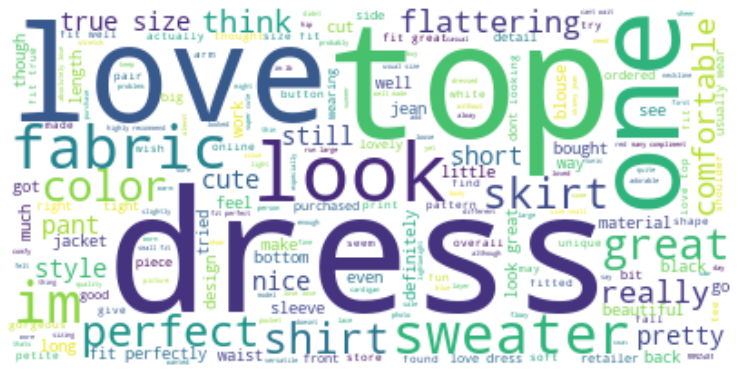

In [48]:
wordcloud_positive = WordCloud(background_color="white", max_words =250)
wordcloud_positive.generate(all_words_positive)
plt.figure(figsize = (13,13))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.show()


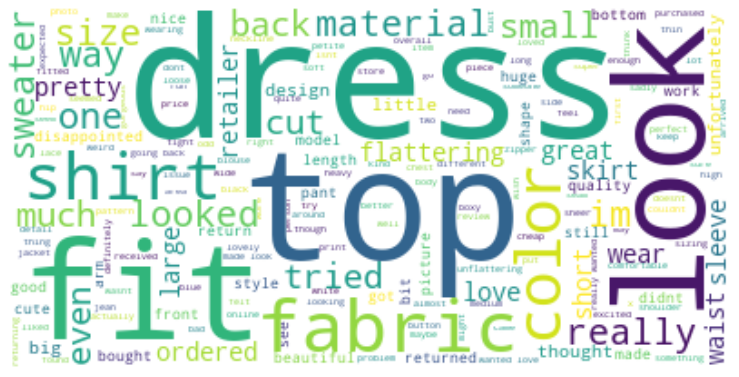

In [54]:
wordcloud_negative = WordCloud(background_color="white", max_words =250)
wordcloud_positive.generate(all_words_negative)
plt.figure(figsize = (13,13))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [55]:
from sklearn.model_selection import train_test_split

In [58]:
X = df2["Comment"].values
y = df2["Rate"].map({0:1, 1:0}).values

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [62]:
from sklearn.feature_extraction.text import CountVectorizer

In [63]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3)
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [64]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [65]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,aa,ab,abby,abdomen,ability,able,abo,absolute,absolutely,abstract,absurd,abt,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,accept,acceptable,access,accessorize,accessorized,accessorizing,...,yet,yikes,yo,yoga,yoke,york,youd,youll,young,younger,youre,youthful,youve,yr,yuck,yucky,yummy,zero,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16935,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16936,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16937,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16938,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [67]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [68]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [69]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

,aa,ab,abby,abdomen,ability,able,abo,absolute,absolutely,abstract,absurd,abt,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,accept,acceptable,access,accessorize,accessorized,accessorizing,...,yet,yikes,yo,yoga,yoke,york,youd,youll,young,younger,youre,youthful,youve,yr,yuck,yucky,yummy,zero,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.265276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
from sklearn.metrics import confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score

In [71]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

## Logistic Regression

### CountVectorizer

In [72]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C =0.01, max_iter=1000, class_weight= "balanced", random_state=101)
log.fit(X_train_count,y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [73]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[2992  460]
 [ 100  683]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.91      3452
           1       0.60      0.87      0.71       783

    accuracy                           0.87      4235
   macro avg       0.78      0.87      0.81      4235
weighted avg       0.90      0.87      0.88      4235

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     13809
           1       0.63      0.90      0.74      3131

    accuracy                           0.88     16940
   macro avg       0.80      0.89      0.83     16940
weighted avg       0.91      0.88      0.89     16940



In [74]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring= ["accuracy", "f1", "recall", "precision"]

model = LogisticRegression(C =0.01, max_iter=1000, class_weight= "balanced", random_state=101)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.870838
train_accuracy     0.883478
test_f1            0.712842
train_f1           0.740964
test_recall        0.866820
train_recall       0.901664
test_precision     0.605470
train_precision    0.628882
dtype: float64

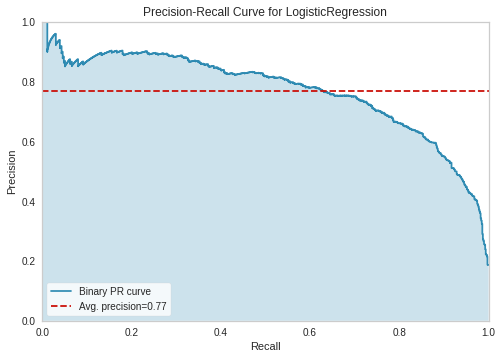

In [75]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
    LogisticRegression(C =0.01, max_iter=1000, class_weight= "balanced", random_state=101) 
    )
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [76]:
y_pred = log.predict(X_test_count)
log_AP_count = viz.score_
log_count_rec = recall_score(y_test, y_pred)
log_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [77]:
log = LogisticRegression(C=0.06, max_iter=1000, random_state=101, class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.06, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [78]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[2956  496]
 [ 101  682]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      3452
           1       0.58      0.87      0.70       783

    accuracy                           0.86      4235
   macro avg       0.77      0.86      0.80      4235
weighted avg       0.90      0.86      0.87      4235

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     13809
           1       0.61      0.91      0.73      3131

    accuracy                           0.88     16940
   macro avg       0.79      0.89      0.82     16940
weighted avg       0.91      0.88      0.88     16940



In [79]:
model = LogisticRegression(C=0.06, max_iter=1000, random_state=101, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.865289
train_accuracy     0.874905
test_f1            0.707395
train_f1           0.728653
test_recall        0.880550
train_recall       0.908726
test_precision     0.591270
train_precision    0.608146
dtype: float64

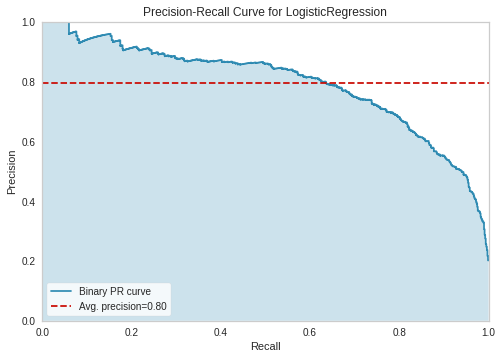

In [80]:
viz = PrecisionRecallCurve(
    LogisticRegression(C=0.06, max_iter=1000, random_state=101, class_weight="balanced")
    )
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [81]:
y_pred = log.predict(X_test_tf_idf)
log_AP_tfidf = viz.score_
log_tfidf_rec = recall_score(y_test, y_pred)
log_tfidf_f1 = f1_score(y_test,y_pred)

## Naive Bayes 

### Countvectorizer

In [82]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB # Hatırlatma: Data binary de olsa, multinomial da olsa 2 sini de kullanacağız demiştik ki zaten multiNB daha iyi sonuç verdiği için onu kullandık
nb = MultinomialNB(alpha=1.5)
nb.fit(X_train_count,y_train)

MultinomialNB(alpha=1.5)

In [83]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[3230  222]
 [ 168  615]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      3452
           1       0.73      0.79      0.76       783

    accuracy                           0.91      4235
   macro avg       0.84      0.86      0.85      4235
weighted avg       0.91      0.91      0.91      4235

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     13809
           1       0.76      0.84      0.80      3131

    accuracy                           0.92     16940
   macro avg       0.86      0.89      0.87     16940
weighted avg       0.93      0.92      0.92     16940



In [84]:
model = MultinomialNB(alpha=1.5)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.905018
train_accuracy     0.923180
test_f1            0.754143
train_f1           0.801513
test_recall        0.787926
train_recall       0.839171
test_precision     0.723388
train_precision    0.767096
dtype: float64

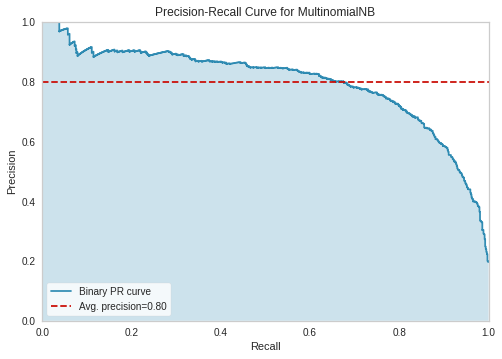

In [85]:
viz = PrecisionRecallCurve(
    MultinomialNB(alpha=1.5),
   
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [86]:
y_pred = nb.predict(X_test_count)
nb_AP_count = viz.score_
nb_count_rec = recall_score(y_test, y_pred)
nb_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [87]:
nb = BernoulliNB(alpha=0.7)
nb.fit(X_train_tf_idf,y_train)

BernoulliNB(alpha=0.7)

In [88]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[3211  241]
 [ 178  605]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3452
           1       0.72      0.77      0.74       783

    accuracy                           0.90      4235
   macro avg       0.83      0.85      0.84      4235
weighted avg       0.90      0.90      0.90      4235

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     13809
           1       0.75      0.84      0.79      3131

    accuracy                           0.92     16940
   macro avg       0.86      0.89      0.87     16940
weighted avg       0.92      0.92      0.92     16940



In [89]:
model = BernoulliNB(alpha=0.7)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.899055
train_accuracy     0.919651
test_f1            0.741033
train_f1           0.794664
test_recall        0.781222
train_recall       0.841194
test_precision     0.704976
train_precision    0.753016
dtype: float64

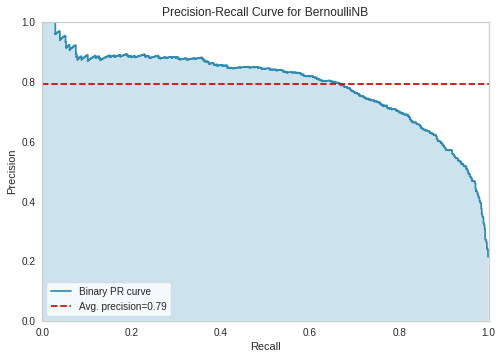

In [90]:
viz = PrecisionRecallCurve(
    BernoulliNB(alpha=0.7),
   
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [91]:
y_pred = nb.predict(X_test_tf_idf)
nb_AP_tfidf = viz.score_
nb_tfidf_rec = recall_score(y_test, y_pred)
nb_tfidf_f1 = f1_score(y_test,y_pred)

## Support Vector Machine (SVM)

### Countvectorizer

In [92]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.001, class_weight="balanced", random_state=101)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.001, class_weight='balanced', random_state=101)

In [93]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[2997  455]
 [ 101  682]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      3452
           1       0.60      0.87      0.71       783

    accuracy                           0.87      4235
   macro avg       0.78      0.87      0.81      4235
weighted avg       0.90      0.87      0.88      4235

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     13809
           1       0.63      0.90      0.74      3131

    accuracy                           0.89     16940
   macro avg       0.80      0.89      0.83     16940
weighted avg       0.91      0.89      0.89     16940



In [94]:
model = LinearSVC(C=0.001, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.872963
train_accuracy     0.885190
test_f1            0.716930
train_f1           0.744625
test_recall        0.869691
train_recall       0.905604
test_precision     0.609973
train_precision    0.632241
dtype: float64

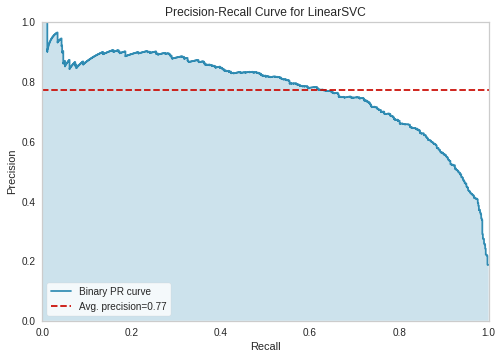

In [95]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.001, class_weight="balanced", random_state=101),
  
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [96]:
y_pred = svc.predict(X_test_count)
svc_AP_count = viz.score_
svc_count_rec = recall_score(y_test, y_pred)
svc_count_f1 = f1_score(y_test,y_pred)

### TD-IDF

In [97]:
svc = LinearSVC(C=0.03, class_weight="balanced", random_state=101)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.03, class_weight='balanced', random_state=101)

In [98]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[3021  431]
 [  87  696]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      3452
           1       0.62      0.89      0.73       783

    accuracy                           0.88      4235
   macro avg       0.79      0.88      0.82      4235
weighted avg       0.91      0.88      0.89      4235

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.94     13809
           1       0.66      0.93      0.78      3131

    accuracy                           0.90     16940
   macro avg       0.82      0.91      0.86     16940
weighted avg       0.92      0.90      0.91     16940



In [99]:
model = LinearSVC(C=0.03, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.883235
train_accuracy     0.899259
test_f1            0.737301
train_f1           0.774243
test_recall        0.885983
train_recall       0.934632
test_precision     0.631489
train_precision    0.660840
dtype: float64

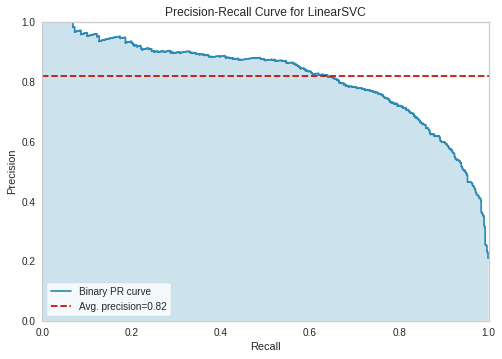

In [100]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.03, class_weight="balanced", random_state=101),

)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [101]:
y_pred = svc.predict(X_test_tf_idf)
svc_AP_tfidf = viz.score_
svc_tfidf_rec = recall_score(y_test, y_pred)
svc_tfidf_f1 = f1_score(y_test,y_pred)

## Random Forest

### Countvectorizer

In [103]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=9, n_jobs=-1,
                       random_state=42)

In [104]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[3008  444]
 [ 140  643]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      3452
           1       0.59      0.82      0.69       783

    accuracy                           0.86      4235
   macro avg       0.77      0.85      0.80      4235
weighted avg       0.89      0.86      0.87      4235

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.89      0.93     13809
           1       0.64      0.88      0.74      3131

    accuracy                           0.89     16940
   macro avg       0.81      0.88      0.83     16940
weighted avg       0.91      0.89      0.89     16940



In [105]:
model = RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced")
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.858560
train_accuracy     0.887065
test_f1            0.681618
train_f1           0.742881
test_recall        0.818270
train_recall       0.882643
test_precision     0.584286
train_precision    0.641412
dtype: float64

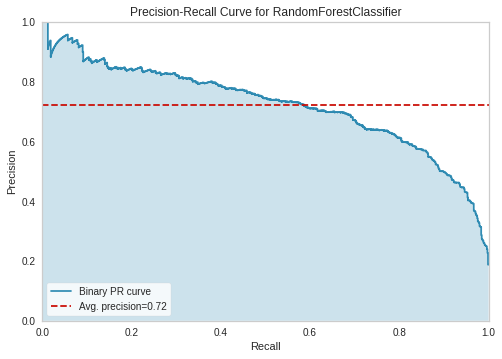

In [106]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced"),
  
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [107]:
y_pred = rf.predict(X_test_count)
rf_AP_count = viz.score_
rf_count_rec = recall_score(y_test, y_pred)
rf_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [108]:
rf = RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=9, n_jobs=-1,
                       random_state=42)

In [109]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[2970  482]
 [ 139  644]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3452
           1       0.57      0.82      0.67       783

    accuracy                           0.85      4235
   macro avg       0.76      0.84      0.79      4235
weighted avg       0.88      0.85      0.86      4235

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.88      0.93     13809
           1       0.63      0.89      0.74      3131

    accuracy                           0.89     16940
   macro avg       0.80      0.89      0.83     16940
weighted avg       0.91      0.89      0.89     16940



## Ada Boosting

### Countvectorizer

In [111]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42, learning_rate=0.8)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=500, random_state=42)

In [112]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[3296  156]
 [ 277  506]]
Test_Set
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      3452
           1       0.76      0.65      0.70       783

    accuracy                           0.90      4235
   macro avg       0.84      0.80      0.82      4235
weighted avg       0.89      0.90      0.89      4235

Train_Set
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     13809
           1       0.86      0.72      0.79      3131

    accuracy                           0.93     16940
   macro avg       0.90      0.85      0.87     16940
weighted avg       0.93      0.93      0.92     16940



In [113]:
y_pred = rf.predict(X_test_tf_idf)
rf_AP_tfidf = viz.score_
rf_tfidf_rec = recall_score(y_test, y_pred)
rf_tfidf_f1 = f1_score(y_test,y_pred)

In [114]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 42, learning_rate=0.8)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.901122
train_accuracy     0.929391
test_f1            0.707036
train_f1           0.792638
test_recall        0.645792
train_recall       0.730154
test_precision     0.781788
train_precision    0.866839
dtype: float64

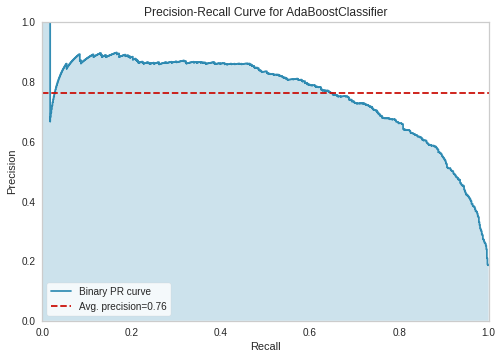

In [115]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42, learning_rate=0.8),
    
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [116]:
y_pred = ada.predict(X_test_count)
ada_AP_count = viz.score_
ada_count_rec = recall_score(y_test, y_pred)
ada_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [117]:
ada = AdaBoostClassifier(n_estimators= 200, random_state = 42, learning_rate=0.8)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=200, random_state=42)

In [118]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[3299  153]
 [ 316  467]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      3452
           1       0.75      0.60      0.67       783

    accuracy                           0.89      4235
   macro avg       0.83      0.78      0.80      4235
weighted avg       0.88      0.89      0.88      4235

Train_Set
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     13809
           1       0.83      0.67      0.74      3131

    accuracy                           0.91     16940
   macro avg       0.88      0.82      0.84     16940
weighted avg       0.91      0.91      0.91     16940



In [119]:
model = AdaBoostClassifier(n_estimators= 200, random_state = 42, learning_rate=0.8)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.894982
train_accuracy     0.913925
test_f1            0.681229
train_f1           0.742637
test_recall        0.607477
train_recall       0.671919
test_precision     0.776012
train_precision    0.830011
dtype: float64

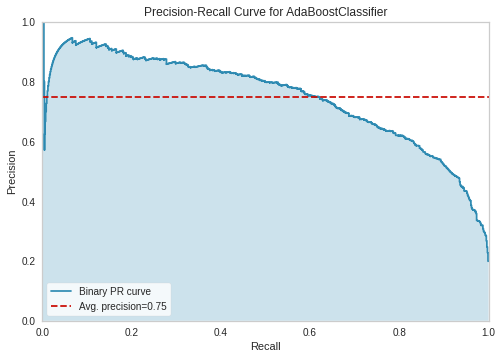

In [120]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 200, random_state = 42, learning_rate=0.8),

)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [121]:
y_pred = ada.predict(X_test_tf_idf)
ada_AP_tfidf = viz.score_
ada_tfidf_rec = recall_score(y_test, y_pred)
ada_tfidf_f1 = f1_score(y_test,y_pred)

## DL modeling

In [122]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [123]:
df2.shape

(21175, 2)

### Tokenization

In [124]:
num_words = 15000 
tokenizer = Tokenizer(num_words=num_words)

In [125]:
tokenizer.fit_on_texts(X)

### Creating word index

In [126]:
tokenizer.word_index

{'dress': 1,
 'fit': 2,
 'not': 3,
 'size': 4,
 'love': 5,
 'top': 6,
 'color': 7,
 'like': 8,
 'look': 9,
 'wear': 10,
 'great': 11,
 'im': 12,
 'would': 13,
 'fabric': 14,
 'small': 15,
 'perfect': 16,
 'really': 17,
 'little': 18,
 'ordered': 19,
 'one': 20,
 'flattering': 21,
 'soft': 22,
 'well': 23,
 'comfortable': 24,
 'back': 25,
 'bought': 26,
 'nice': 27,
 'cute': 28,
 'beautiful': 29,
 'bit': 30,
 'material': 31,
 'shirt': 32,
 'sweater': 33,
 'large': 34,
 'jean': 35,
 'much': 36,
 'length': 37,
 'run': 38,
 'also': 39,
 'work': 40,
 'got': 41,
 'petite': 42,
 'long': 43,
 'short': 44,
 'waist': 45,
 'skirt': 46,
 'quality': 47,
 'medium': 48,
 'retailer': 49,
 'think': 50,
 'even': 51,
 'pretty': 52,
 'make': 53,
 'feel': 54,
 'x': 55,
 'pant': 56,
 'store': 57,
 'tried': 58,
 'usually': 59,
 'get': 60,
 'sleeve': 61,
 'way': 62,
 'good': 63,
 'go': 64,
 'could': 65,
 'cut': 66,
 'dont': 67,
 'big': 68,
 'black': 69,
 'made': 70,
 'still': 71,
 'right': 72,
 'true': 73,
 '

In [127]:
len(tokenizer.word_index)

11643

### Converting tokens to numeric

In [128]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [129]:
X[100]

'shirt exactly pictured burnt orange color love received numerous compliment paired jean tucked fun skirt fit true size normally wear small retailer however slightest bit tight shoulder would give top'

### Maximum number of tokens for all documents¶

In [130]:
print(X_num_tokens[100])

[32, 353, 296, 1639, 410, 7, 5, 168, 1747, 127, 414, 35, 703, 193, 46, 2, 73, 4, 169, 10, 15, 49, 93, 2355, 30, 91, 99, 13, 163, 6]


### Fixing token counts of all documents (pad_sequences)

In [131]:
len(X_num_tokens[100])

30

In [132]:
len(X_num_tokens[150])

13

In [135]:
num_tokens = [len(tokens) for tokens in X_num_tokens] # her bir yorumda kaç token var
num_tokens = np.array(num_tokens)

In [136]:
num_tokens.mean()

28.68255017709563

In [137]:
num_tokens.max()

59

In [138]:
num_tokens.argmax()

11189

In [139]:
X[15213]

'love maeve top love material feel brand saw new top came ran local store try one im usually large top xl large try tried black motif could barely get top looked like missing top doubled checked size large shame top really cute least bit broad busty go size two usually'

In [140]:
max_tokens = 116

In [141]:
sum(num_tokens <= max_tokens) / len(num_tokens)

1.0

In [142]:
X_pad = pad_sequences(X_num_tokens, maxlen = max_tokens)
# maxlen = max_tokens: Her birini 116 tokene sabitle

In [143]:
X_pad.shape

(21175, 116)

In [144]:
np.array(X_num_tokens[500])

array([  58,    1,  195,  264,   41,  536, 1044,  641,  197, 1550,  198,
        157,   26,   20, 1550, 1904,  232,  106,   11,  216,   26,   11,
        285,  406,    2,   73,    4,   26,  284,    4,   70,   45,    9,
         17,   15])

In [145]:
X_pad[500]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,   58,    1,  195,  264,   41,  536, 1044,
        641,  197, 1550,  198,  157,   26,   20, 1550, 1904,  232,  106,
         11,  216,   26,   11,  285,  406,    2,   73,    4,   26,  284,
          4,   70,   45,    9,   17,   15], dtype=int32)

In [146]:
np.array(X_num_tokens[15213])

array([   5,  589,    6,    5,   31,   54,  319,  128,  328,    6,  265,
        400,  363,   57,  117,   20,   12,   59,   34,    6,  323,   34,
        117,   58,   69,  584,   65,  632,   60,    6,  106,    8, 1319,
          6, 3544, 1450,    4,   34, 1120,    6,   17,   28,  401,   30,
        530,  457,   64,    4,  183,   59])

In [147]:
X_pad[15213] 

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          5,  589,    6,    5,   31,   54,  319,  128,  328,    6,  265,
        400,  363,   57,  117,   20,   12,   59,   34,    6,  323,   34,
        117,   58,   69,  584,   65,  632,   60,    6,  106,    8, 1319,
          6, 3544, 1450,    4,   34, 1120,    6,   17,   28,  401,   30,
        530,  457,   64,    4,  183,   59], dtype=int32)

### Train Set Split

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.1, stratify=y, random_state=101)

### Modeling

In [150]:
model = Sequential()

In [151]:
embedding_size = 50

In [152]:
model.add(Embedding(input_dim=num_words,       
                    output_dim=embedding_size, 
                    input_length=max_tokens)) 
model.add(Dropout(0.2))

model.add(GRU(units=48, return_sequences=True)) 
model.add(Dropout(0.2))

model.add(GRU(units=24, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=12))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [153]:
optimizer = Adam(lr=0.001)

In [154]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=["Recall"])

In [155]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 116, 50)           750000    
                                                                 
 dropout (Dropout)           (None, 116, 50)           0         
                                                                 
 gru (GRU)                   (None, 116, 48)           14400     
                                                                 
 dropout_1 (Dropout)         (None, 116, 48)           0         
                                                                 
 gru_1 (GRU)                 (None, 116, 24)           5328      
                                                                 
 dropout_2 (Dropout)         (None, 116, 24)           0         
                                                                 
 gru_2 (GRU)                 (None, 12)                1

In [156]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", mode="max", 
                           verbose=1, patience = 1, restore_best_weights=True)

In [157]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()

array([0.61339642, 2.70465512])

In [158]:
model.fit(X_train, y_train, epochs=25, batch_size=128, sample_weight=classes_weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/25
149/149 [==============================] - 37s 186ms/step - loss: 0.4546 - recall: 0.8481 - val_loss: 0.3895 - val_recall: 0.9207
Epoch 2/25
149/149 [==============================] - 26s 172ms/step - loss: 0.2471 - recall: 0.9157 - val_loss: 0.3897 - val_recall: 0.9361
Epoch 3/25
149/149 [==============================] - 26s 172ms/step - loss: 0.1968 - recall: 0.9432 - val_loss: 0.3082 - val_recall: 0.8849
Epoch 3: early stopping


EVALUATION

In [159]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.454621,0.848141,0.389496,0.920716
1,0.247133,0.915697,0.389650,0.936061
2,0.196822,0.943230,0.308151,0.884910


<AxesSubplot:>

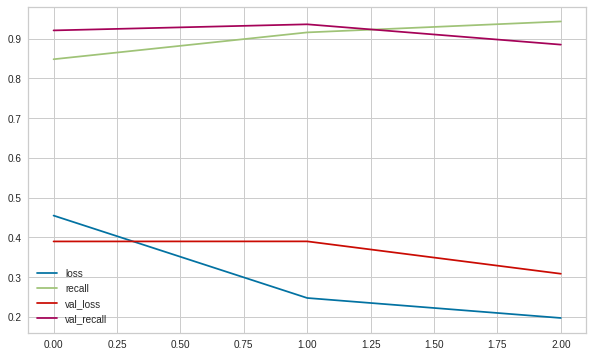

In [160]:
model_loss.plot()

In [161]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

67/67 [==============================] - 2s 23ms/step
[[1434  293]
 [  25  366]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      1727
           1       0.56      0.94      0.70       391

    accuracy                           0.85      2118
   macro avg       0.77      0.88      0.80      2118
weighted avg       0.90      0.85      0.86      2118



In [162]:
y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

596/596 [==============================] - 12s 20ms/step
[[13375  2159]
 [   58  3465]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.86      0.92     15534
           1       0.62      0.98      0.76      3523

    accuracy                           0.88     19057
   macro avg       0.81      0.92      0.84     19057
weighted avg       0.93      0.88      0.89     19057



67/67 [==============================] - 1s 20ms/step


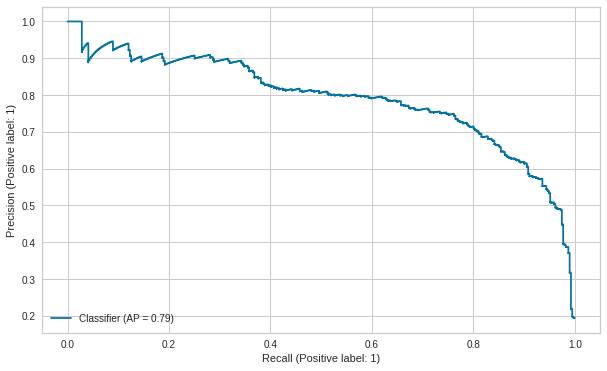

In [163]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

y_pred_proba = model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

In [164]:
from sklearn.metrics import average_precision_score

average_precision_score(y_test, y_pred_proba)

0.791472964587089

In [165]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

## BERT Modeling

In [167]:
#!pip install transformers

In [168]:
import numpy as np
import pandas as pd

### Tokenization

In [169]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

max_token = []
for sent in X:
    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    max_token.append(len(input_ids))

print('Max sentence length: ', max(max_token))

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Max sentence length:  76


In [170]:
np.array(max_token).mean()

33.57846517119244

In [171]:
sum(np.array(max_token) <= 162) / len(max_token)

1.0

### Train test split

In [172]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.1, stratify=y, random_state=101)

### Transformation text to tensor

In [173]:
def transformation(X):

  seq_len = 162
  num_samples = len(X)

  Xids = np.zeros((num_samples, seq_len))  
  Xmask = np.zeros((num_samples, seq_len))

    
  for i, phrase in enumerate(X):
      tokens = tokenizer.encode_plus(phrase, max_length=seq_len, truncation=True,
                                      padding='max_length', add_special_tokens=True) 

      Xids[i] = tokens['input_ids']
      Xmask[i] = tokens['attention_mask']
  return Xids, Xmask

In [174]:
Xids_train, Xmask_train = transformation(X_train2)
Xids_test, Xmask_test = transformation(X_test2)

In [175]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)

Xids_train.shape  : (19057, 162)
Xmask_train.shape : (19057, 162)
Xids_test.shape   : (2118, 162)
Xmask_test.shape  : (2118, 162)


In [176]:
labels_train = y_train2.reshape(-1,1)
labels_train

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]])

In [177]:
labels_test = y_test2.reshape(-1,1)
labels_test

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [178]:
import tensorflow as tf
dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train, Xmask_train, labels_train))
dataset_train

<TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.float64, name=None), TensorSpec(shape=(162,), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [179]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test, Xmask_test, labels_test))
dataset_test

<TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.float64, name=None), TensorSpec(shape=(162,), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [180]:
def map_func(Xids, Xmask, labels):
    return {'input_ids': Xids, 'attention_mask': Xmask}, labels

In [181]:
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

In [182]:
dataset_train

<MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.float64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [183]:
dataset_test

<MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.float64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

### Batch Size

In [184]:
batch_size = 64

train_ds = dataset_train.batch(batch_size) 
val_ds = dataset_test.batch(batch_size)

length = len(X_train)
train_ds2 = dataset_train.shuffle(buffer_size = length, reshuffle_each_iteration=True).batch(batch_size)

### Creating Model

In [185]:
def create_model():
    from transformers import TFAutoModel 
    from tensorflow.keras.layers import Input, Dropout, Dense
    from tensorflow.keras import Model

    model = TFAutoModel.from_pretrained("bert-base-uncased") 

    input_ids = Input(shape=(162,), name='input_ids', dtype='int32')          
    attention_mask = Input(shape=(162,), name='attention_mask', dtype='int32') 

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] 

    x = Dense(80, activation='relu')(embeddings) 
    x = Dropout(0.1, name="dropout")(x) 
    y = Dense(1, activation='sigmoid', name='outputs')(x)

    return Model(inputs=[input_ids, attention_mask], outputs=y) 

In [188]:
with strategy.scope(): 

  from tensorflow.keras.optimizers import Adam
  from tensorflow.keras.losses import BinaryCrossentropy
  from tensorflow.keras.metrics import Recall
  
  optimizer = Adam(learning_rate=2e-5) 
  loss = BinaryCrossentropy()
  recall = Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [189]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 162)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 162)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 162,                                           

In [190]:
history = model3.fit(
    train_ds2, validation_data= val_ds,
    epochs=1) 

298/298 [==============================] - 184s 333ms/step - loss: 0.2514 - recall: 0.6353 - val_loss: 0.1872 - val_recall: 0.8107


### Model evaluation

In [191]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model3.predict(val_ds) >= 0.5

print(classification_report(y_test2, y_pred))

34/34 [==============================] - 16s 313ms/step
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1727
           1       0.78      0.81      0.79       391

    accuracy                           0.92      2118
   macro avg       0.87      0.88      0.87      2118
weighted avg       0.92      0.92      0.92      2118



In [192]:
y_train_pred = model3.predict(train_ds) >= 0.5

print(classification_report(y_train2, y_train_pred)) 

298/298 [==============================] - 17s 54ms/step
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     15534
           1       0.85      0.88      0.87      3523

    accuracy                           0.95     19057
   macro avg       0.91      0.92      0.92     19057
weighted avg       0.95      0.95      0.95     19057



34/34 [==============================] - 2s 39ms/step


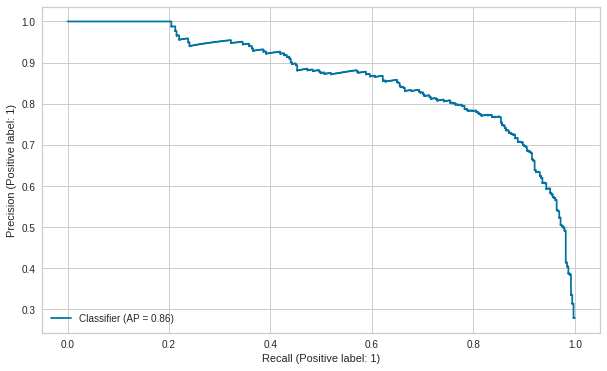

In [193]:
y_pred_proba = model3.predict(val_ds)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

In [194]:
average_precision_score(y_test2, y_pred_proba)

0.8636358992111173

In [195]:
BERT_without_weighted_AP = average_precision_score(y_test2, y_pred_proba)
BERT_without_weighted_f1 = f1_score(y_test2, y_pred)
BERT_without_weighted_rec = recall_score(y_test2, y_pred)

# BERT Model  with Weighted Data

In [196]:
def create_model():
    from transformers import TFAutoModel
    from tensorflow.keras.layers import Input, Dropout, Dense
    from tensorflow.keras import Model

    model = TFAutoModel.from_pretrained("bert-base-uncased")

    input_ids = Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = Dense(80, activation='relu')(embeddings) 
    x = Dropout(0.2, name="dropout")(x) #0.1
    y = Dense(1, activation='sigmoid', name='outputs')(x)

    return Model(inputs=[input_ids, attention_mask], outputs=y)

In [197]:
with strategy.scope():

  from tensorflow.keras.optimizers import Adam
  from tensorflow.keras.losses import BinaryCrossentropy
  from tensorflow.keras.metrics import Recall
  
  optimizer = Adam(learning_rate=2e-5) #3e-5, 5e-5
  loss = BinaryCrossentropy()
  precision = Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[precision])

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [198]:
pd.Series(y).value_counts(normalize=True)

0    0.815159
1    0.184841
dtype: float64

In [199]:
weights = {0:1, 1:3} 

In [200]:
history = model3.fit(
    train_ds2, validation_data= val_ds,
    epochs=1, class_weight=weights)

298/298 [==============================] - 206s 344ms/step - loss: 0.4986 - recall_1: 0.7743 - val_loss: 0.2602 - val_recall_1: 0.9207


In [201]:
y_pred = model3.predict(val_ds) >= 0.5


print(classification_report(y_test2, y_pred))

34/34 [==============================] - 15s 319ms/step
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      1727
           1       0.65      0.92      0.76       391

    accuracy                           0.89      2118
   macro avg       0.81      0.90      0.85      2118
weighted avg       0.92      0.89      0.90      2118



In [202]:
y_train_pred = model3.predict(train_ds) >= 0.5


print(classification_report(y_train2, y_train_pred)) 

298/298 [==============================] - 17s 55ms/step
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     15534
           1       0.71      0.96      0.82      3523

    accuracy                           0.92     19057
   macro avg       0.85      0.94      0.88     19057
weighted avg       0.94      0.92      0.92     19057



In [203]:
y_pred_proba = model3.predict(val_ds)
average_precision_score(y_test2, y_pred_proba)

34/34 [==============================] - 2s 38ms/step


0.8431523591378304

In [204]:
BERT_with_weighted_AP = average_precision_score(y_test2, y_pred_proba)
BERT_with_weighted_f1 = f1_score(y_test2, y_pred)
BERT_with_weighted_rec = recall_score(y_test2, y_pred)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

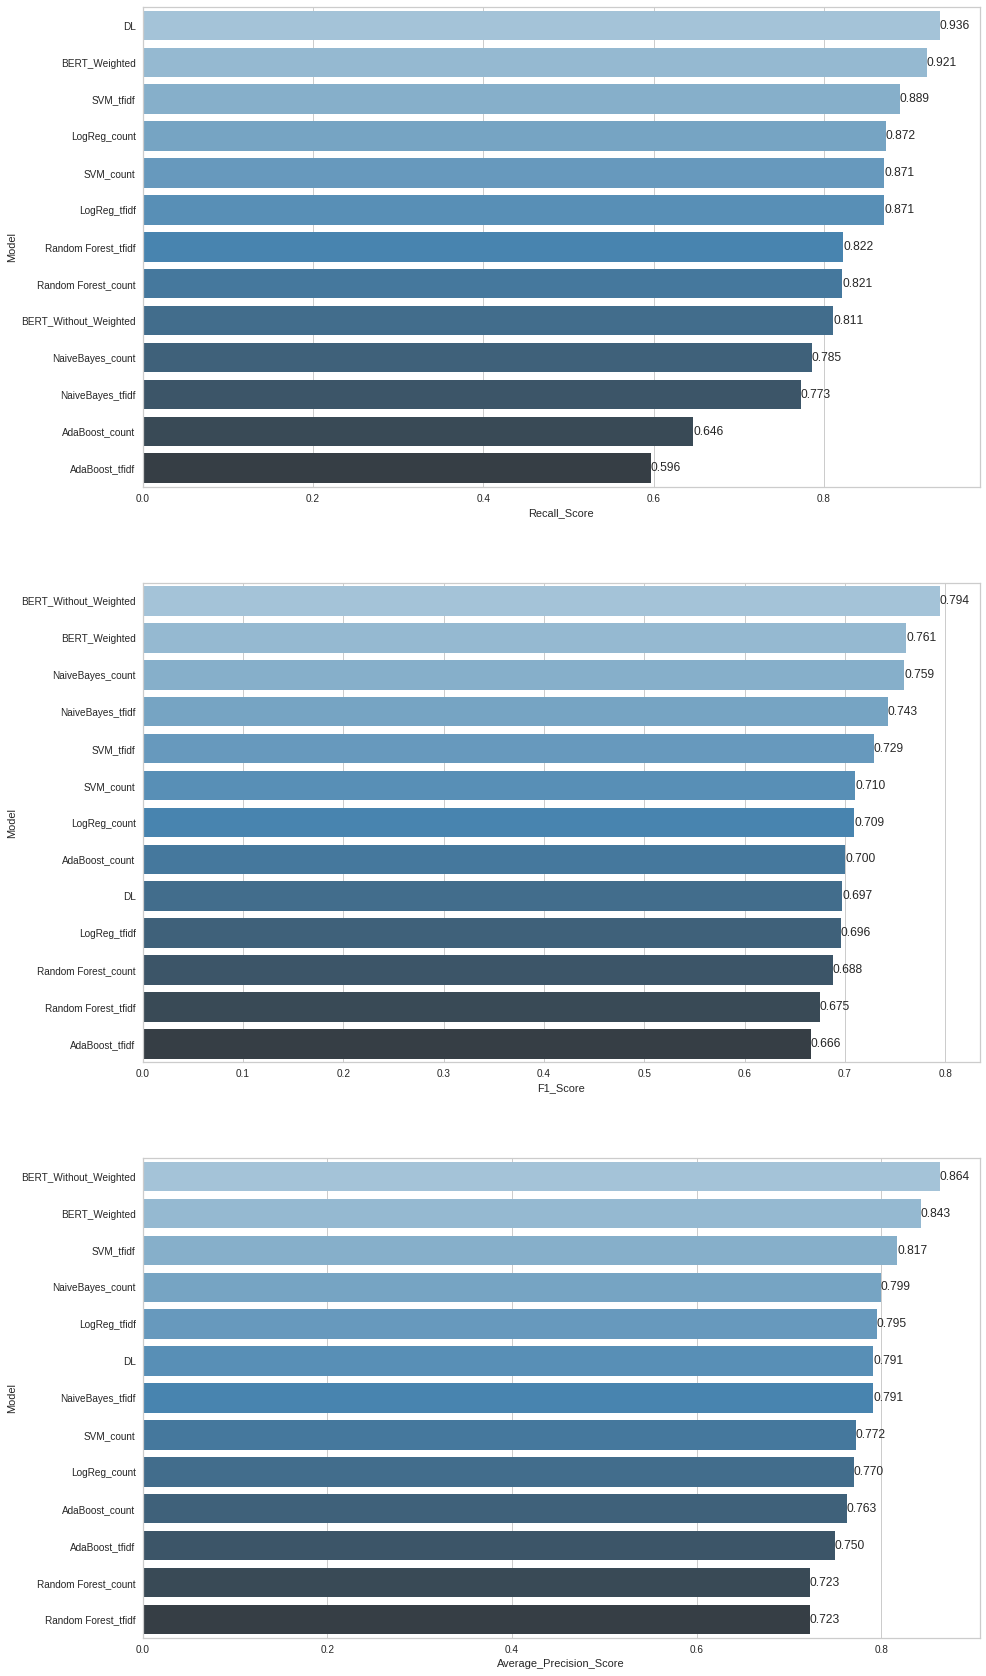

In [205]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count", 
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf", 
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "DL", "BERT_Weighted", "BERT_Without_Weighted"],
                        
                        "F1_Score": [nb_count_f1, log_count_f1, svc_count_f1,
                                             rf_count_f1, ada_count_f1, nb_tfidf_f1, log_tfidf_f1,
                                             svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1, DL_f1, BERT_with_weighted_f1, BERT_without_weighted_f1],
                        
                        "Recall_Score": [nb_count_rec, log_count_rec, svc_count_rec, 
                                                   rf_count_rec, ada_count_rec, 
                                                  nb_tfidf_rec, log_tfidf_rec, svc_tfidf_rec, 
                                                  rf_tfidf_rec, ada_tfidf_rec, DL_rec, BERT_with_weighted_rec, BERT_without_weighted_rec],
                        
                        "Average_Precision_Score": [nb_AP_count, log_AP_count, svc_AP_count, rf_AP_count,
                                                   ada_AP_count, nb_AP_tfidf, log_AP_tfidf, svc_AP_tfidf,
                                                   rf_AP_tfidf, ada_AP_tfidf, DL_AP, BERT_with_weighted_AP, BERT_without_weighted_AP]})


plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax=sns.barplot(x="Recall_Score", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score", ascending=False)
ax=sns.barplot(x="Average_Precision_Score", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();